In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings

In [3]:
from keras.models import load_model

In [4]:
final_model = load_model('../input/best-model-for-brain-tumor-classification/best_model_2.h5')

2022-08-08 16:47:43.586629: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-08 16:47:43.678882: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-08 16:47:43.679640: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-08 16:47:43.680783: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [5]:
# I got this code from Jay on kaggle, https://www.kaggle.com/code/jaykumar1607/brain-tumor-mri-classification-tensorflow-cnn
# code comment is mine
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']
# Making a labels list to use it for a for loop to pull out the data.

In [6]:
# I got this code from Jay on kaggle, https://www.kaggle.com/code/jaykumar1607/brain-tumor-mri-classification-tensorflow-cnn
# the code comments are mine
X_train = []
y_train = []
# making empty lists
image_size = 150
# making the image size we want to be 150, so the images will be 150x150
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri/Training',i)
    # this will give the path to each of the data folders inside of Training
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        # this is taking all the data and appending it to the X_train, and y_train lists we made.
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri/Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        # this is doing the same thing as the for loop above, but for the data under testing 
        # still appending it to the same training list, to put all the data together to run a train test split
        
X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 74/74 [00:00<00:00, 88.26it/s]


In [7]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)
# shuffling the data so we can get a new split in our train set split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

X_test, X_hold, y_test, y_hold = train_test_split(X_test, y_test, test_size=50, shuffle=False)

In [9]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [10]:
y_hold_new = []
for i in y_hold:
    y_hold_new.append(labels.index(i))
y_hold = y_hold_new
y_hold = tf.keras.utils.to_categorical(y_hold)

In [11]:
df_train = pd.DataFrame(y_train)

In [12]:
df_train['tumor'] = df_train[0] + df_train[2] + df_train[3]
df_train

,0,1,2,3,tumor
0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...
2932,0.0,0.0,1.0,0.0,1.0
2933,0.0,1.0,0.0,0.0,0.0
2934,0.0,0.0,1.0,0.0,1.0
2935,0.0,0.0,0.0,1.0,1.0


In [13]:
df_train = df_train.rename(columns = {1:'no_tumor'})

In [14]:
df_train = df_train.drop(columns = [0,2,3])

In [15]:
y_train = df_train.to_numpy()

In [16]:
df_test = pd.DataFrame(y_test)

In [17]:
df_test['tumor'] = df_test[0] + df_test[2] + df_test[3]
df_test

,0,1,2,3,tumor
0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...
272,0.0,0.0,0.0,1.0,1.0
273,0.0,0.0,0.0,1.0,1.0
274,1.0,0.0,0.0,0.0,1.0
275,0.0,0.0,0.0,1.0,1.0


In [18]:
df_test = df_test.rename(columns = {1:'no_tumor'})
df_test

,0,no_tumor,2,3,tumor
0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...
272,0.0,0.0,0.0,1.0,1.0
273,0.0,0.0,0.0,1.0,1.0
274,1.0,0.0,0.0,0.0,1.0
275,0.0,0.0,0.0,1.0,1.0


In [19]:
df_test = df_test.drop(columns = [0,2,3])
df_test

,no_tumor,tumor
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0
...,...,...
272,0.0,1.0
273,0.0,1.0
274,0.0,1.0
275,0.0,1.0


In [20]:
y_test = df_test.to_numpy()
y_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.

In [21]:
df_hold = pd.DataFrame(y_hold)

In [22]:
df_hold['tumor'] = df_hold[0] + df_hold[2] + df_hold[3]
df_hold

,0,1,2,3,tumor
0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,1.0
6,0.0,0.0,0.0,1.0,1.0
7,0.0,1.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,1.0
9,1.0,0.0,0.0,0.0,1.0


In [23]:
df_hold = df_hold.rename(columns = {1:'no_tumor'})
df_hold

,0,no_tumor,2,3,tumor
0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,1.0
6,0.0,0.0,0.0,1.0,1.0
7,0.0,1.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,1.0
9,1.0,0.0,0.0,0.0,1.0


In [24]:
df_hold = df_hold.drop(columns = [0,2,3])
df_hold

,no_tumor,tumor
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0
5,0.0,1.0
6,0.0,1.0
7,1.0,0.0
8,0.0,1.0
9,0.0,1.0


In [25]:
y_hold = df_hold.to_numpy()
y_hold

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [26]:
final_model.evaluate(X_hold,y_hold[:,1])

2022-08-08 16:48:16.450929: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-08-08 16:48:18.086559: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


2/2 [==============================] - 7s 168ms/step - loss: 0.2715 - accuracy: 1.0000


[0.2715494930744171, 1.0]

In [85]:
y_hold[:,1][2]

0.0

In [84]:
final_model.predict(X_hold)[2]

array([0.0090965], dtype=float32)

In [27]:
# Explainable AI library
from lime import lime_image
from skimage.segmentation import mark_boundaries

In [86]:
# Instantiate the Lime Image Explainer(): 
explainer = lime_image.LimeImageExplainer()

# Fit on the explainer by specifying the image and final_model:
explanation = explainer.explain_instance(X_hold[2], 
                                         final_model.predict,  
                                         labels=[0,1], hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

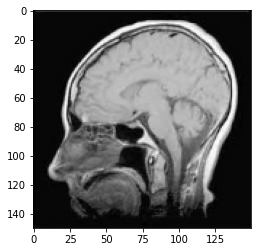

In [83]:
plt.imshow(X_hold[2])

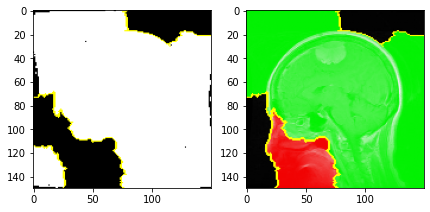

In [79]:
temp1, mask1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=True)
temp2, mask2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7,7))
ax1.imshow(mark_boundaries(temp1, mask1))
ax2.imshow(mark_boundaries(temp2, mask2));

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

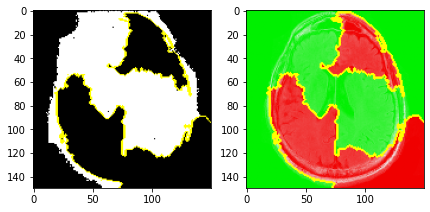

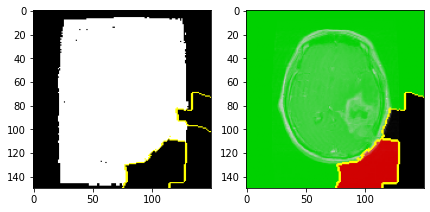

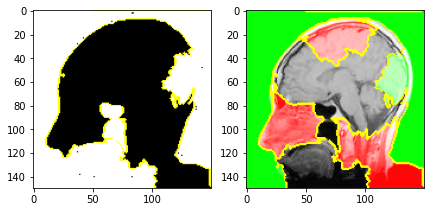

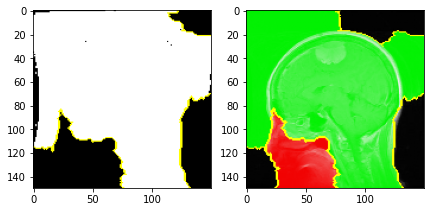

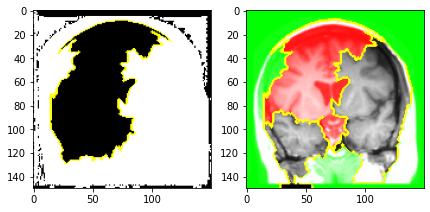

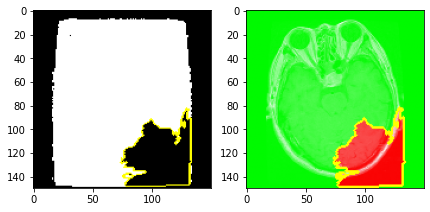

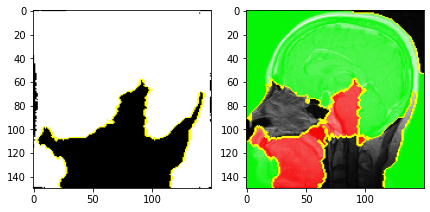

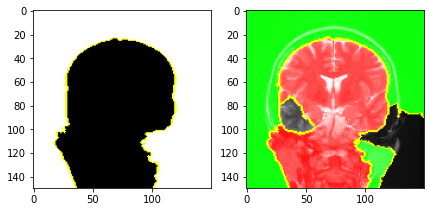

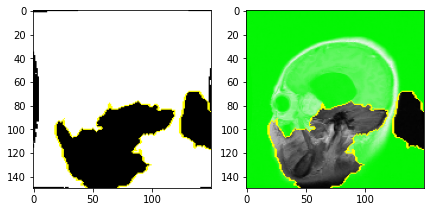

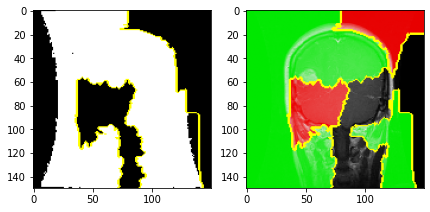

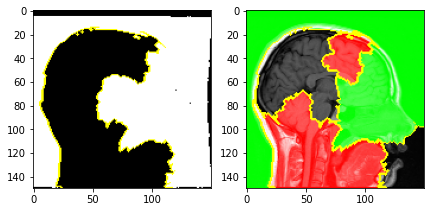

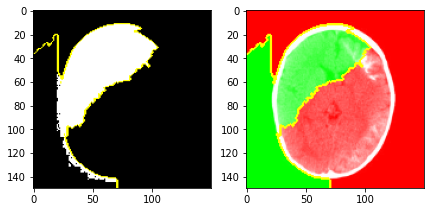

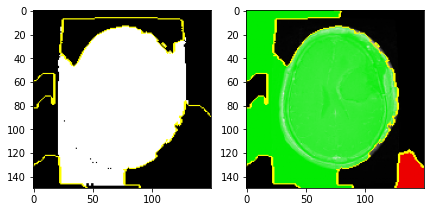

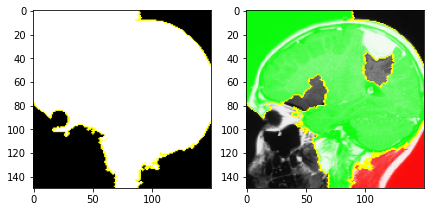

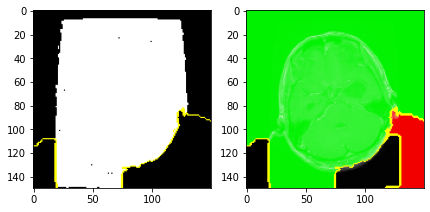

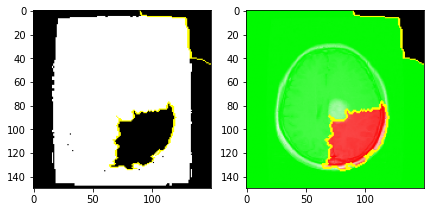

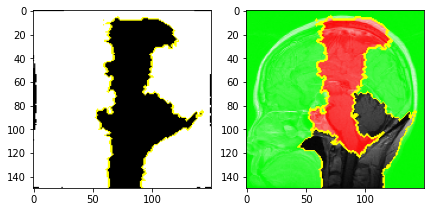

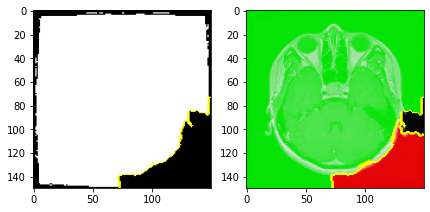

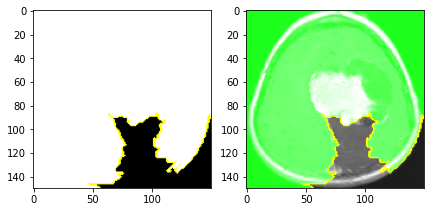

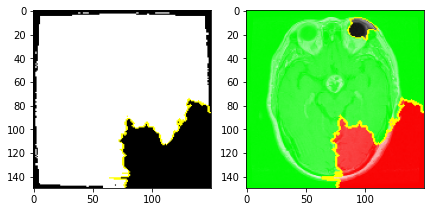

In [81]:
for index in list(range(0,20)):
    explainer = lime_image.LimeImageExplainer()

    explanation = explainer.explain_instance(X_hold[index], 
                                         final_model.predict,  
                                         labels=[0,1], hide_color=0, num_samples=1000)
    temp1, mask1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=True)
    temp2, mask2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7,7))
    ax1.imshow(mark_boundaries(temp1, mask1))
    ax2.imshow(mark_boundaries(temp2, mask2));

In [82]:
y_hold[:,1][:20]

array([0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1.], dtype=float32)